# HELLO FELLOW GROUP MEMBERS! IF YOU'RE CONTRIBUTING, MAKE SURE TO: 
1. Use snake case, like this: (snake_case) instead of camel case, like this: (camelCase). Whitespace is a lot easier to read. 
2. Use the ascribed format shown later down. 
3. The more comments or markdown comments the better. I'm probably setting a bad example, but it helps. 
4. Ask questions! If something is wrong or confusing, be sure to ask.
5. Always use seed 42. It's the meaning of life, after all. 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns 
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
dataset = pd.read_csv('BankChurners.csv')
dataset.head()




,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
dataset['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [4]:
truncated_dataset = dataset.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM'],axis=1)

We'll drop these columns, as we don't need them. Worst comes to worst, I'll use clientnum as an index variable. Not sure yet. 

In [5]:
truncated_dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


We need to encode the string data so that our algorithm can work with them.

In [6]:
from sklearn import preprocessing
#le = preprocessing.OrdinalEncoder()
le = preprocessing.LabelEncoder()
encoded_dataset = truncated_dataset

encoded_dataset['Attrition_Flag'] = truncated_dataset['Attrition_Flag'].map({"Attrited Customer": 1, "Existing Customer": 0})

#encoded_dataset['Attrition_Flag'] = truncated_dataset['Attrition_Flag'].map({"Attrited Customer": 1, "Existing Customer": 0})
encoded_dataset['Education_Level'] = truncated_dataset['Education_Level'].map ({"Uneducated": 0, "High School": 1, "Unknown": 4, "College": 2, "Graduate": 3, "Post-Graduate": 4, "Doctorate": 5})
encoded_dataset['Income_Category'] =  truncated_dataset['Income_Category'].map({"Less than $40K": 0, "$40K - $60K": 1, "Unknown": 0, "$60K - $80K": 2, "$80K - $120K": 3, "$120K +": 4 })
encoded_dataset['Card_Category'] = truncated_dataset['Card_Category'].map({"Blue":0, "Silver": 1, "Gold": 2, "Platinum": 3})
encoded_dataset['Gender'] = truncated_dataset['Gender'].map({"M": 0, "F": 1})
#encoded_dataset['Marital_Status'] = truncated_dataset['Marital_Status'].map({"Single":0, "Unknown": 1, "Married":2, "Widowed":3, "Divorced":0})


'''
encoded_dataset['Attrition_Flag'] = le.fit_transform(dataset.Attrition_Flag.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))
encoded_dataset['Marital_Status'] = le.fit_transform(dataset.Marital_Status.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))
encoded_dataset['Income_Category'] = le.fit_transform(dataset.Income_Category.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))
encoded_dataset['Card_Category'] = le.fit_transform(dataset.Card_Category.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))
encoded_dataset['Gender'] = le.fit_transform(dataset.Gender.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))
'''


#encoded_dataset['Marital_Status'] = le.fit_transform(dataset['Marital_Status'])
#encoded_dataset['Income_Category'] = le.fit_transform(dataset.Income_Category.values)
#encoded_dataset['Card_Category'] = le.fit_transform(dataset.Card_Category.values)
#encoded_dataset['Gender'] = le.fit_transform(dataset.Gender.values)




dummy_dataset = pd.get_dummies(encoded_dataset)

As seen above, these are the dummy variables we've encoded, and their associated value maps. 

In [7]:
encoded_dataset.head()
#dummy_dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,1,Married,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,3,Single,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,3,Married,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,1,Unknown,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,0,Married,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [8]:
dummy_dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0,45,0,3,1,2,0,39,5,1,...,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0
1,0,49,1,5,3,0,0,44,6,1,...,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0
2,0,51,0,3,3,3,0,36,4,1,...,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0
3,0,40,1,4,1,0,0,34,3,4,...,796.0,1.405,1171,20,2.333,0.760,0,0,0,1
4,0,40,0,3,0,2,0,21,5,1,...,4716.0,2.175,816,28,2.500,0.000,0,1,0,0


# IMPORTANT! I AM UNSURE AS TO IF CERTAIN COLUMNS WILL BE STANDARDIZED OR NOT, SUCH AS DEPENDENT COUNT. I'VE ASKED THE PROFESSOR, BUT THE VARIABLES ARE SUBJECT TO CHANGE.
I'll split the data into three parts: the non ordinal columns, which we'll standardize, the ordinal columns which we won't standardize, and the target, which we won't standardize either. 

In [9]:
#non_ordinal_col = dummy_dataset.drop(['Attrition_Flag', 'Education_Level','Dependent_count','Marital_Status','Income_Category', 'Card_Category', 'Gender', 'Customer_Age'], axis=1)
#ordinal_col = dummy_dataset[['Education_Level','Dependent_count','Marital_Status','Income_Category', 'Card_Category', 'Gender', 'Customer_Age']].copy()

#non_ordinal_col = dummy_dataset.drop(['Attrition_Flag', 'Education_Level','Dependent_count','Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', "Marital_Status_Unknown", 'Income_Category', 'Card_Category', 'Gender', 'Customer_Age'], axis=1)
#ordinal_col = dummy_dataset[['Education_Level','Dependent_count','Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', "Marital_Status_Unknown", 'Income_Category', 'Card_Category', 'Gender', 'Customer_Age']].copy()
#print(dummy_dataset.keys())


non_ordinal_col = dummy_dataset.drop(['Attrition_Flag', 'Education_Level','Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', "Marital_Status_Unknown", 'Income_Category', 'Card_Category', 'Gender', 'Customer_Age'], axis=1)
ordinal_col = dummy_dataset[['Education_Level','Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', "Marital_Status_Unknown", 'Income_Category', 'Card_Category', 'Gender', 'Customer_Age']].copy()

predictors = dummy_dataset.drop(['Attrition_Flag'], axis=1)
target = dummy_dataset['Attrition_Flag'].copy()


In [10]:
non_ordinal_col.head()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [11]:
ordinal_col.head()

,Education_Level,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category,Card_Category,Gender,Customer_Age
0,1,0,1,0,0,2,0,0,45
1,3,0,0,1,0,0,0,1,49
2,3,0,1,0,0,3,0,0,51
3,1,0,0,0,1,0,0,1,40
4,0,0,1,0,0,2,0,0,40


In [12]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [13]:
non_ordinal_col_standardized = preprocessing.scale(non_ordinal_col)
non_ordinal_col_standardized = pd.DataFrame(non_ordinal_col_standardized, index = dataset.index, columns = non_ordinal_col.columns)

#predictors_standardized = preprocessing.scale(predictors)
#predictors_standardized = pd.DataFrame(predictors_standardized, index = dataset.index, columns = predictors.columns)


Below, we can see our non ordinal columns are now standardized:

In [14]:
non_ordinal_col_standardized.describe()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04
mean,5.680062e-15,-5.687166e-16,8.453372e-15,-2.129892e-15,1.588144e-15,9.430893e-16,-1.830898e-15,-4.386159e-17,2.801869e-16,-5.134192e-16,1.194179e-14,-1.306570e-16,-2.298338e-16
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-1.806378e+00,-2.871068e+00,-1.809512e+00,-2.316674e+00,-2.219655e+00,-7.915266e-01,-1.426858e+00,-8.213361e-01,-3.466947e+00,-1.146344e+00,-2.337256e+00,-2.991597e+00,-9.971550e-01
25%,-1.036462e+00,-6.171294e-01,-5.227845e-01,-3.375979e-01,-4.116160e-01,-6.686548e-01,-9.863389e-01,-6.759604e-01,-5.882438e-01,-6.619405e-01,-8.460801e-01,-5.469820e-01,-9.137243e-01
50%,-2.665471e-01,8.964513e-03,1.205790e-01,-3.375979e-01,-4.116160e-01,-4.492525e-01,1.388875e-01,-4.394979e-01,-1.092203e-01,-1.486877e-01,9.123036e-02,-4.293775e-02,-3.587287e-01
75%,5.033681e-01,5.098397e-01,7.639426e-01,6.519402e-01,4.924038e-01,2.679862e-01,7.622408e-01,2.629041e-01,4.519214e-01,9.918090e-02,6.877007e-01,4.443050e-01,8.274384e-01
max,2.043199e+00,2.513340e+00,1.407306e+00,3.620555e+00,3.204463e+00,2.848054e+00,1.661686e+00,2.975375e+00,1.203060e+01,4.144855e+00,3.158792e+00,1.260857e+01,2.626640e+00


In [15]:
dataset_standardized = pd.concat([ordinal_col, non_ordinal_col_standardized], axis=1)

In [16]:
#dataset_standardized.head()
#predictors_standardized = preprocessing.scale(predictors)
#predictors_standardized = pd.DataFrame(predictors_standardized, index = dataset.index, columns = predictors.columns)
#dataset_standardized = predictors_standardized

In [17]:
dataset_standardized.head()

,Education_Level,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category,Card_Category,Gender,Customer_Age,Dependent_count,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,0,1,0,0,2,0,0,45,0.503368,...,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,3,0,0,1,0,0,0,1,49,2.043199,...,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,3,0,1,0,0,3,0,0,51,0.503368,...,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,1,0,0,0,1,0,0,1,40,1.273283,...,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,0,0,1,0,0,2,0,0,40,0.503368,...,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


Note to group: I have no clue on what variables or not to sample. I've already emailed the professor about this question by the time this is done. 

In [18]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


undersampler = RandomUnderSampler(sampling_strategy='majority', random_state = 42)
oversampler = RandomOverSampler(sampling_strategy='minority', random_state = 42)
smotesampler = SMOTE(sampling_strategy = 'minority', random_state = 42)

In [19]:
from sklearn.model_selection import train_test_split 

raveled_target = target.values.ravel() # made to supress a warning. Converts a y column to a 1d array. 

predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, raveled_target, test_size = 0.33,  random_state = 42)



predictors_oversampled, target_oversampled = oversampler.fit_resample(predictors_train, target_train)
predictors_undersampled, target_undersampled = undersampler.fit_resample(predictors_train, target_train)
predictors_smotesampled, target_smotesampled = smotesampler.fit_resample(predictors_train, target_train)


In [20]:
import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay, PrecisionRecallDisplay, accuracy_score
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split


predictors_over_train = predictors_oversampled
predictors_under_train = predictors_undersampled
predictors_smote_train = predictors_smotesampled

predictors_over_test = predictors_under_test = predictors_smote_test = predictors_test



target_over_train = target_oversampled
target_under_train = target_undersampled
target_smote_train = target_smotesampled

target_over_test =  target_under_test = target_smote_test  = target_test



#predictors_over_train, predictors_over_test, target_over_train, target_over_test = train_test_split(predictors_oversampled, target_oversampled, test_size = 0.2,  random_state = 42)
#predictors_under_train, predictors_under_test, target_under_train, target_under_test = train_test_split(predictors_undersampled, target_undersampled, test_size = 0.2,  random_state = 42)
#predictors_smote_train, predictors_smote_test, target_smote_train, target_smote_test = train_test_split(predictors_smotesampled, target_smotesampled, test_size = 0.2,  random_state = 42)

In [21]:
def avg(lst):
    return sum(lst) / len(lst)

# IMPORTANT! I MIGHT'VE MESSED UP IN SPLITTING THE DATASET ONLY INTO TRAINING AND TEST, IT MAY TURN INTO TRAINING, TEST, AND VALIDATION. KEEP THAT IN MIND, AS THE FORMAT MAY CHANGE TO USE VALIDATION VARIABLES INSTEAD.

The main format for the classifiers is as such: 
1. Fit the data. 
2. Check it's training precision and recall using cross_val_predict using training variables. 
3. Use the classifier .predict() function to gather a non cross validated prediction using test variables instead. This is necessary to use our gather our test results. 
4. Using test variables, gather the precision and recall. 
5. Using test variables and the fitted model(i.e. knn), plot the PR curve. 
6. Using test variables and the non cross validated prediction, produce a classification report. This is distinct from our previous recall and precision samples since it breaks it down by category. Category 1 is more important, as those the customers that are churning. 

## Classifiers using over sampling

### KNN (N=5)

Metrics Regarding Training Data:
Train Precision Score for KNN(N=5)(Oversampled):  0.868577694235589
Train Recall Score for KNN(N=5)(Oversampled)  0.9729777153886647
Train F1 Score for KNN(N=5)(Oversampled)  0.9178184225771746
Train Accuracy KNN(N=5)(Oversampled)  0.9128813363522943
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      5699
           1       0.87      0.97      0.92      5699

    accuracy                           0.91     11398
   macro avg       0.92      0.91      0.91     11398
weighted avg       0.92      0.91      0.91     11398

Metrics Regarding Test Data:
Test Precision Score for KNN(N=5)(Oversampled):  0.4888888888888889
Test Recall Score for KNN(N=5)(Oversampled):  0.7726432532347505
Test F1 Score for KNN(N=5)(Oversampled):  0.5988538681948424
Test Accuracy KNN(N=5)(Oversampled)  0.8755197068549467
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2801
 

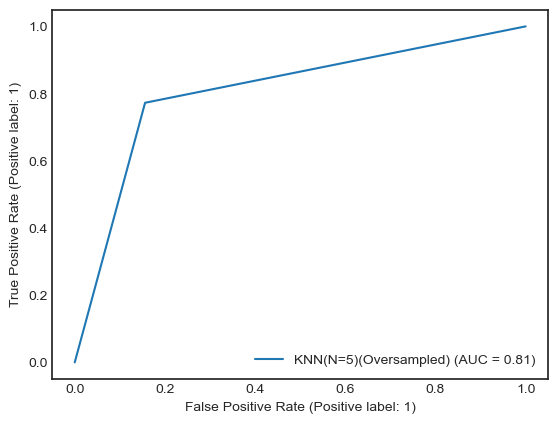

ROC AUC Score for KNN(N=5) (Oversampled): 0.8083137722796387


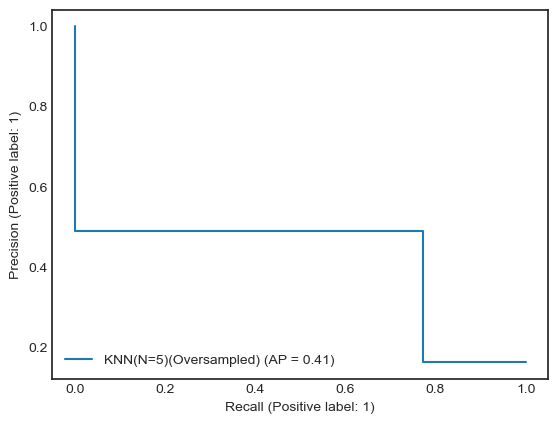

In [22]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import cross_val_predict, cross_val_score

#P.s. These comments are only on this certain classifier, sorry, as I forgot to put them on earlier!
#This'll show you an example of how we'll make our metrics. Again, do remember that validation variables may be used in the future
#instead. 

knn_clf_over = knn(n_neighbors=5) #the base classifier, this'll be something like KNN, SGD, etc..
knn_clf_over.fit(predictors_over_train, target_over_train) #fitting for the training data. 

model = "KNN(N=5)"
sampling_type = "Oversampled"
combined_name = model + "(" + sampling_type + ")"



print("Metrics Regarding Training Data:")
knn_clf_over_predict_train = cross_val_predict(knn_clf_over, predictors_over_train, target_over_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_over_train, knn_clf_over_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_over_train, knn_clf_over_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_over_train, knn_clf_over_predict_train))
print (f"Train Accuracy {combined_name} " , avg(cross_val_score(knn_clf_over, predictors_over_train, target_over_train
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_over_train, knn_clf_over_predict_train))


print("Metrics Regarding Test Data:")
knn_clf_over_predict_test = knn_clf_over.predict(predictors_over_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_over_test, knn_clf_over_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_over_test, knn_clf_over_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_over_test, knn_clf_over_predict_test))
print (f"Test Accuracy {combined_name} " , avg(cross_val_score(knn_clf_over, predictors_over_test, target_over_test
                                                            , cv=10, scoring="accuracy")))
print(classification_report(target_over_test, knn_clf_over_predict_test))


from sklearn.metrics import roc_auc_score
RocCurveDisplay.from_predictions(target_over_test, knn_clf_over_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_over_test, knn_clf_over_predict_test))



PrecisionRecallDisplay.from_predictions(target_over_test, knn_clf_over_predict_test, name = combined_name)
plt.show()

### SGD

Metrics Regarding Training Data:
Train Precision Score for SGD(Oversampled):  0.6520569011918493
Train Recall Score for SGD(Oversampled)  0.5951921389717494
Train F1 Score for SGD(Oversampled)  0.6223282267681863
Train Accuracy SGD(Oversampled)  0.6388062011921816
              precision    recall  f1-score   support

           0       0.63      0.68      0.65      5699
           1       0.65      0.60      0.62      5699

    accuracy                           0.64     11398
   macro avg       0.64      0.64      0.64     11398
weighted avg       0.64      0.64      0.64     11398

Metrics Regarding Test Data:
Test Precision Score for SGD(Oversampled):  0.4897579143389199
Test Recall Score for SGD(Oversampled):  0.48613678373382624
Test F1 Score for SGD(Oversampled):  0.48794063079777367
Test Accuracy SGD(Oversampled)  0.7384323889534363
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2801
           1       0.49      0.49     

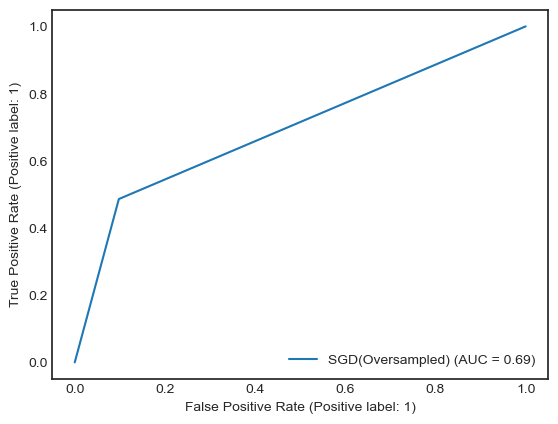

ROC AUC Score for SGD (Oversampled): 0.6941572886894765


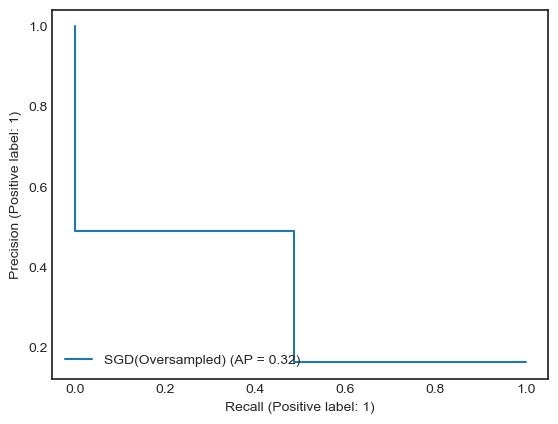

In [23]:
from sklearn.linear_model import SGDClassifier as sgd 

sgd_clf_over = sgd( random_state = 42) 
sgd_clf_over.fit(predictors_over_train, target_over_train)

model = "SGD"
sampling_type = "Oversampled"
combined_name = model + "(" + sampling_type + ")"



print("Metrics Regarding Training Data:")
sgd_clf_over_predict_train = cross_val_predict(sgd_clf_over, predictors_over_train, target_over_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_over_train, sgd_clf_over_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_over_train, sgd_clf_over_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_over_train, sgd_clf_over_predict_train))
print (f"Train Accuracy {combined_name} " , avg(cross_val_score(sgd_clf_over, predictors_over_train, target_over_train
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_over_train, sgd_clf_over_predict_train))


print("Metrics Regarding Test Data:")
sgd_clf_over_predict_test = sgd_clf_over.predict(predictors_over_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_over_test, sgd_clf_over_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_over_test, sgd_clf_over_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_over_test, sgd_clf_over_predict_test))
print (f"Test Accuracy {combined_name} " , avg(cross_val_score(sgd_clf_over, predictors_over_test, target_over_test
                                                            , cv=10, scoring="accuracy")))
print(classification_report(target_over_test, sgd_clf_over_predict_test))


from sklearn.metrics import roc_auc_score
RocCurveDisplay.from_predictions(target_over_test, sgd_clf_over_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_over_test, sgd_clf_over_predict_test))



PrecisionRecallDisplay.from_predictions(target_over_test, sgd_clf_over_predict_test, name = combined_name)
plt.show()

## Decision Tree

Metrics Regarding Training Data:
Train Precision Score for Decision Tree(Oversampled):  0.9637717961740309
Train Recall Score for Decision Tree(Oversampled)  0.9989471837164415
Train F1 Score for Decision Tree(Oversampled)  0.9810442874375322
Train Accuracy Decision Tree(Oversampled)  0.9806988278422131
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5699
           1       0.96      1.00      0.98      5699

    accuracy                           0.98     11398
   macro avg       0.98      0.98      0.98     11398
weighted avg       0.98      0.98      0.98     11398

Metrics Regarding Test Data:
Test Precision Score for Decision Tree(Oversampled):  0.7721518987341772
Test Recall Score for Decision Tree(Oversampled):  0.789279112754159
Test F1 Score for Decision Tree(Oversampled):  0.7806215722120659
Test Accuracy Decision Tree(Oversampled)  0.923407811243185
              precision    recall  f1-score   support

           0    

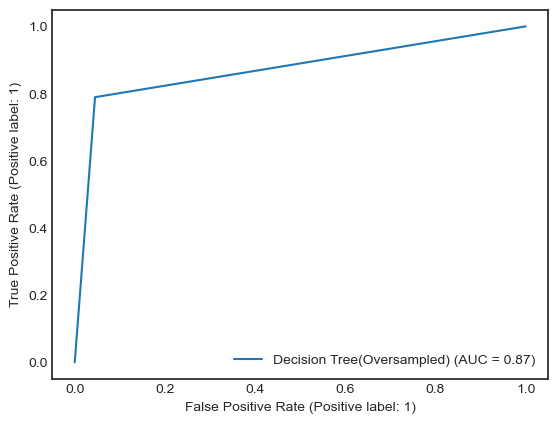

ROC AUC Score for Decision Tree (Oversampled): 0.8721475892224919


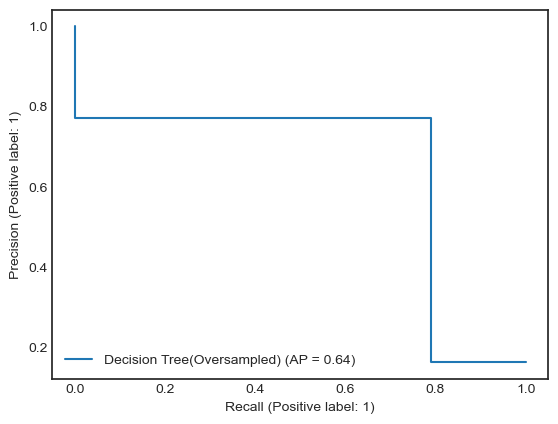

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree_clf_over = DecisionTreeClassifier(random_state=42)
tree_clf_over.fit(predictors_over_train, target_over_train)

model = "Decision Tree"
sampling_type = "Oversampled"
combined_name = model + "(" + sampling_type + ")"



print("Metrics Regarding Training Data:")
tree_clf_over_predict_train = cross_val_predict(tree_clf_over, predictors_over_train, target_over_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_over_train, tree_clf_over_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_over_train, tree_clf_over_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_over_train, tree_clf_over_predict_train))
print (f"Train Accuracy {combined_name} " , avg(cross_val_score(tree_clf_over, predictors_over_train, target_over_train
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_over_train, tree_clf_over_predict_train))


print("Metrics Regarding Test Data:")
tree_clf_over_predict_test = tree_clf_over.predict(predictors_over_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_over_test, tree_clf_over_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_over_test, tree_clf_over_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_over_test, tree_clf_over_predict_test))
print (f"Test Accuracy {combined_name} " , avg(cross_val_score(tree_clf_over, predictors_over_test, target_over_test
                                                            , cv=10, scoring="accuracy")))
print(classification_report(target_over_test, tree_clf_over_predict_test))


from sklearn.metrics import roc_auc_score
RocCurveDisplay.from_predictions(target_over_test, tree_clf_over_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_over_test, tree_clf_over_predict_test))



PrecisionRecallDisplay.from_predictions(target_over_test, tree_clf_over_predict_test, name = combined_name)
plt.show()

## Random Forest 

Metrics Regarding Training Data:
Train Precision Score for Random Forest(Oversampled):  0.9812295505424488
Train Recall Score for Random Forest(Oversampled)  0.9998245306194069
Train F1 Score for Random Forest(Oversampled)  0.9904397705544933
Train Accuracy Random Forest(Oversampled)  0.9903497219783436
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5699
           1       0.98      1.00      0.99      5699

    accuracy                           0.99     11398
   macro avg       0.99      0.99      0.99     11398
weighted avg       0.99      0.99      0.99     11398

Metrics Regarding Test Data:
Test Precision Score for Random Forest(Oversampled):  0.9021956087824351
Test Recall Score for Random Forest(Oversampled):  0.8354898336414048
Test F1 Score for Random Forest(Oversampled):  0.8675623800383877
Test Accuracy Random Forest(Oversampled)  0.9389587073608618
              precision    recall  f1-score   support

           0  

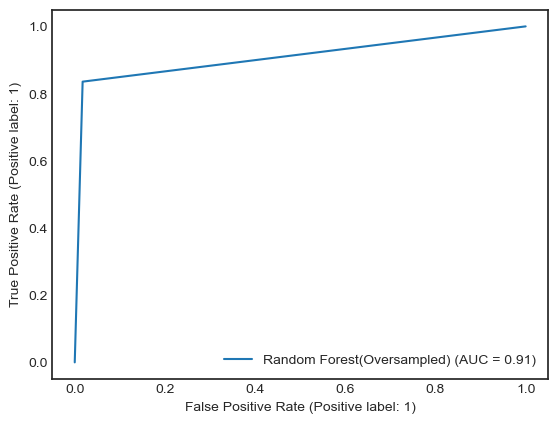

ROC AUC Score for Random Forest (Oversampled): 0.9089980407050293


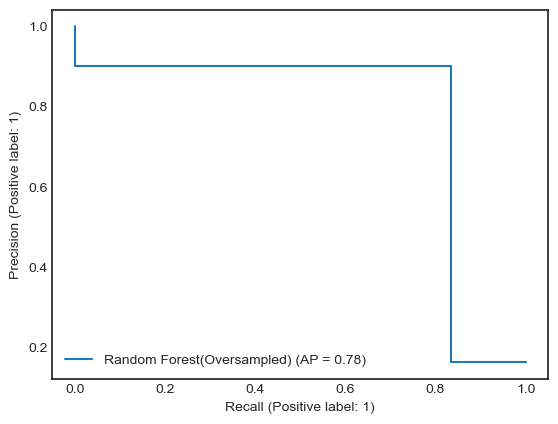

In [25]:
from sklearn.ensemble import RandomForestClassifier



rnd_clf_over = RandomForestClassifier(random_state=42)
rnd_clf_over.fit(predictors_over_train, target_over_train)

model = "Random Forest"
sampling_type = "Oversampled"
combined_name = model + "(" + sampling_type + ")"

print("Metrics Regarding Training Data:")
rnd_clf_over_predict_train = cross_val_predict(rnd_clf_over, predictors_over_train, target_over_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_over_train, rnd_clf_over_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_over_train, rnd_clf_over_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_over_train, rnd_clf_over_predict_train))
print (f"Train Accuracy {combined_name} " , avg(cross_val_score(rnd_clf_over, predictors_over_train, target_over_train
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_over_train, rnd_clf_over_predict_train))


print("Metrics Regarding Test Data:")
rnd_clf_over_predict_test = rnd_clf_over.predict(predictors_over_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_over_test, rnd_clf_over_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_over_test, rnd_clf_over_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_over_test, rnd_clf_over_predict_test))
print (f"Test Accuracy {combined_name} " , avg(cross_val_score(rnd_clf_over, predictors_over_test, target_over_test
                                                            , cv=3, scoring="accuracy")))



print(classification_report(target_over_test, rnd_clf_over_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_over_test, rnd_clf_over_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_over_test, rnd_clf_over_predict_test))



PrecisionRecallDisplay.from_predictions(target_over_test, rnd_clf_over_predict_test, name = combined_name)
plt.show()





## Support Vector Machine

Metrics Regarding Training Data:
Train Precision Score for SVM(Oversampled):  0.7390090718771808
Train Recall Score for SVM(Oversampled)  0.7432882961923144
Train F1 Score for SVM(Oversampled)  0.7411425072172163
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      5699
           1       0.74      0.74      0.74      5699

    accuracy                           0.74     11398
   macro avg       0.74      0.74      0.74     11398
weighted avg       0.74      0.74      0.74     11398

Metrics Regarding Test Data:
Test Precision Score for SVM(Oversampled):  0.32608695652173914
Test Recall Score for SVM(Oversampled):  0.7208872458410351
Test F1 Score for SVM(Oversampled):  0.44905008635578586
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      2801
           1       0.33      0.72      0.45       541

    accuracy                           0.71      3342
   macro avg       0.63      0.7

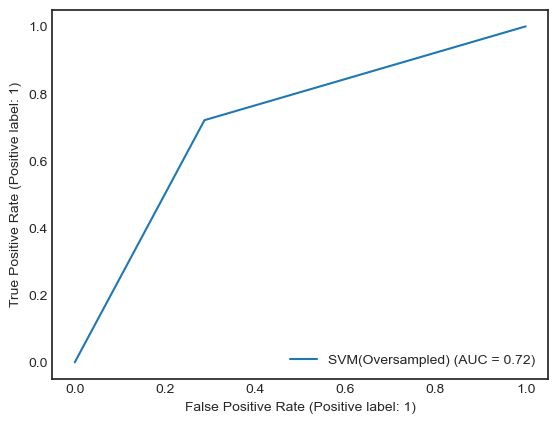

ROC AUC Score for SVM (Oversampled): 0.7165664362014886


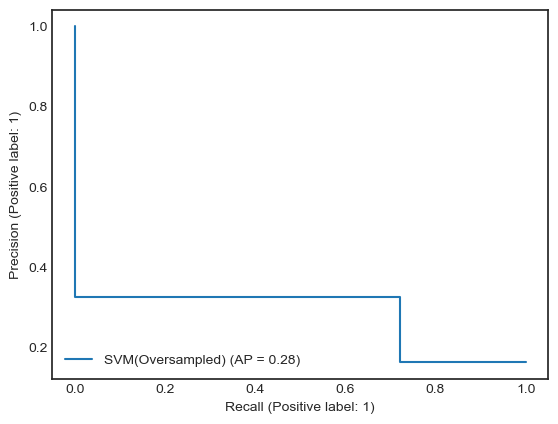

In [26]:
from sklearn import svm
svm_clf_over = svm.SVC(gamma='scale', probability=True)
svm_clf_over.fit(predictors_over_train, target_over_train)


model = "SVM"
sampling_type = "Oversampled"
combined_name = model + "(" + sampling_type + ")"

print("Metrics Regarding Training Data:")
svm_clf_over_predict_train = cross_val_predict(svm_clf_over, predictors_over_train, target_over_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_over_train, svm_clf_over_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_over_train, svm_clf_over_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_over_train, svm_clf_over_predict_train))



print(classification_report(target_over_train, svm_clf_over_predict_train))


print("Metrics Regarding Test Data:")
svm_clf_over_predict_test = svm_clf_over.predict(predictors_over_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_over_test, svm_clf_over_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_over_test, svm_clf_over_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_over_test, svm_clf_over_predict_test))



print(classification_report(target_over_test, svm_clf_over_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_over_test, svm_clf_over_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_over_test, svm_clf_over_predict_test))



PrecisionRecallDisplay.from_predictions(target_over_test, svm_clf_over_predict_test, name = combined_name)
plt.show()



## Two Best Ensemble

Metrics Regarding Training Data:
Train Precision Score for Voting Classifier(Random Forest and Decision Trees)(Oversampled):  0.963934981374873
Train Recall Score for Voting Classifier(Random Forest and Decision Trees)(Oversampled)  0.9989471837164415
Train F1 Score for Voting Classifier(Random Forest and Decision Trees)(Oversampled)  0.9811288237828523
Train Accuracy Voting Classifier(Random Forest and Decision Trees)(Oversampled)  0.9807865471404587
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5699
           1       0.96      1.00      0.98      5699

    accuracy                           0.98     11398
   macro avg       0.98      0.98      0.98     11398
weighted avg       0.98      0.98      0.98     11398

Metrics Regarding Test Data:
Test Precision Score for Voting Classifier(Random Forest and Decision Trees)(Oversampled):  0.7802607076350093
Test Recall Score for Voting Classifier(Random Forest and Decision Trees)(Ove

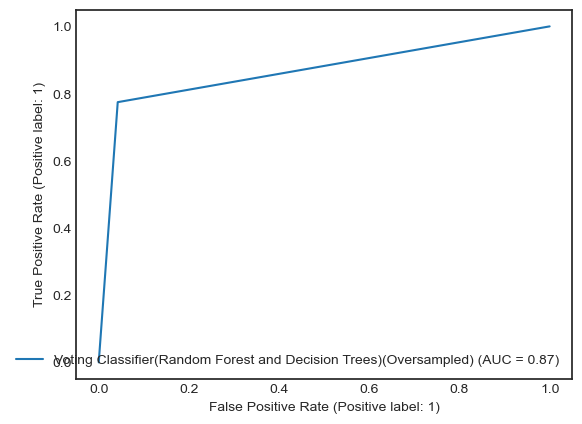

ROC AUC Score for Voting Classifier(Random Forest and Decision Trees) (Oversampled): 0.866181935287173


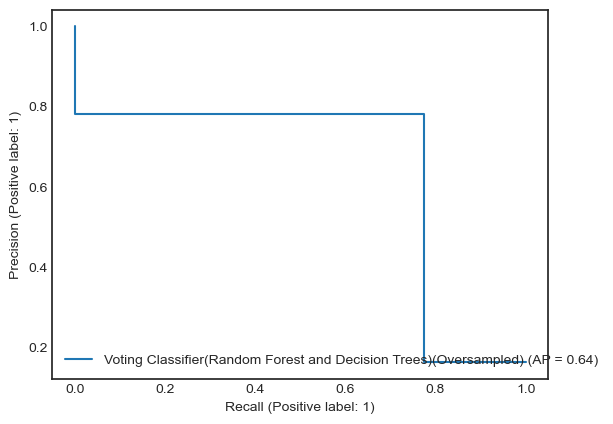

In [27]:
from sklearn.ensemble import VotingClassifier

voting_clf_two_over = VotingClassifier(
    estimators=[('Decision Tree', tree_clf_over), ('Random Forest', rnd_clf_over)],
    voting='soft') # Soft voting
voting_clf_two_over.fit(predictors_train, target_train)


model = "Voting Classifier(Random Forest and Decision Trees)"
sampling_type = "Oversampled"
combined_name = model + "(" + sampling_type + ")"

print("Metrics Regarding Training Data:")
voting_clf_two_over_predict_train = cross_val_predict(voting_clf_two_over, predictors_over_train, target_over_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_over_train, voting_clf_two_over_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_over_train, voting_clf_two_over_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_over_train, voting_clf_two_over_predict_train))
print (f"Train Accuracy {combined_name} " , avg(cross_val_score(voting_clf_two_over, predictors_over_train, target_over_train
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_over_train, voting_clf_two_over_predict_train))


print("Metrics Regarding Test Data:")
voting_clf_two_over_predict_test = voting_clf_two_over.predict(predictors_over_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_over_test, voting_clf_two_over_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_over_test, voting_clf_two_over_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_over_test, voting_clf_two_over_predict_test))
print (f"Test Accuracy {combined_name} " , avg(cross_val_score(voting_clf_two_over, predictors_over_test, target_over_test
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_over_test, voting_clf_two_over_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_over_test, voting_clf_two_over_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_over_test, voting_clf_two_over_predict_test))



PrecisionRecallDisplay.from_predictions(target_over_test, voting_clf_two_over_predict_test, name = combined_name)
plt.show()



## Classifiers using under sampling

### KNN (N=5)

Metrics Regarding Training Data:
Train Precision Score for KNN(under sampled):  0.8339382940108893
Train Recall Score for KNN(under sampled)  0.8462246777163904
Train F1 Score for KNN(under sampled)  0.840036563071298
Train Accuracy KNN(under sampled)  0.838844966811821
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1086
           1       0.83      0.85      0.84      1086

    accuracy                           0.84      2172
   macro avg       0.84      0.84      0.84      2172
weighted avg       0.84      0.84      0.84      2172

Metrics Regarding Test Data:
Test Precision Score for KNN(under sampled):  0.4888888888888889
Test Recall Score for KNN(under sampled):  0.7726432532347505
Test F1 Score for KNN(under sampled):  0.5988538681948424
Test Accuracy KNN(under sampled)  0.8755197068549467
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2801
           1       0.49   

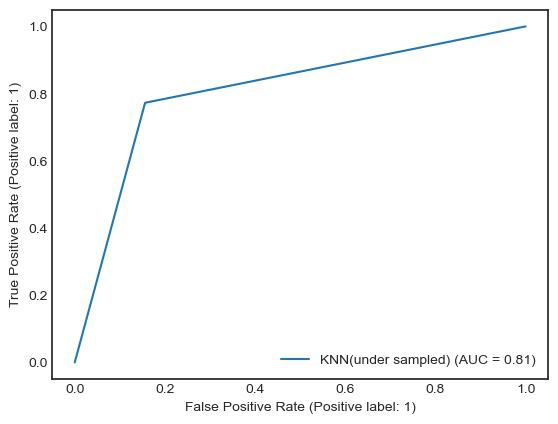

ROC AUC Score for KNN (under sampled): 0.8083137722796387


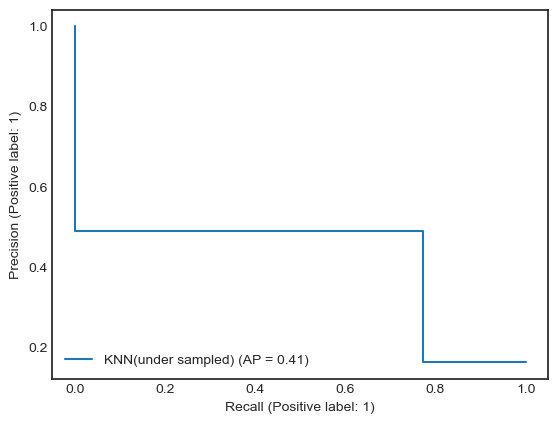

In [28]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import cross_val_predict, cross_val_score
import sklearn.metrics

#P.s. These comments are only on this certain classifier, sorry, as I forgot to put them on earlier!
#This'll show you an example of how we'll make our metrics. Again, do remember that validation variables may be used in the future
#instead. 

knn_clf_under = knn(n_neighbors=5) #the base classifier, this'll be something like KNN, SGD, etc..
knn_clf_under.fit(predictors_over_train, target_over_train) #fitting for the training data. 

model = "KNN"
sampling_type = "under sampled"
combined_name = model + "(" + sampling_type + ")"

print("Metrics Regarding Training Data:")
knn_clf_under_predict_train = cross_val_predict(knn_clf_under, predictors_under_train, target_under_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_under_train, knn_clf_under_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_under_train, knn_clf_under_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_under_train, knn_clf_under_predict_train))
print (f"Train Accuracy {combined_name} " , avg(cross_val_score(knn_clf_under, predictors_under_train, target_under_train
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_under_train, knn_clf_under_predict_train))


print("Metrics Regarding Test Data:")
knn_clf_under_predict_test = knn_clf_under.predict(predictors_under_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_under_test, knn_clf_under_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_under_test, knn_clf_under_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_under_test, knn_clf_under_predict_test))
print (f"Test Accuracy {combined_name} " , avg(cross_val_score(knn_clf_under, predictors_under_test, target_under_test
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_under_test, knn_clf_under_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_under_test, knn_clf_under_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_under_test, knn_clf_under_predict_test))



PrecisionRecallDisplay.from_predictions(target_under_test, knn_clf_under_predict_test, name = combined_name)
plt.show()



### SGD

Metrics Regarding Training Data:
Train Precision Score for SGD(under sampled):  0.6137787056367432
Train Recall Score for SGD(under sampled)  0.5414364640883977
Train F1 Score for SGD(under sampled)  0.5753424657534246
Train Accuracy SGD(under sampled)  0.600359362448738
              precision    recall  f1-score   support

           0       0.59      0.66      0.62      1086
           1       0.61      0.54      0.58      1086

    accuracy                           0.60      2172
   macro avg       0.60      0.60      0.60      2172
weighted avg       0.60      0.60      0.60      2172

Metrics Regarding Test Data:
Test Precision Score for SGD(under sampled):  0.0
Test Recall Score for SGD(under sampled):  0.0
Test F1 Score for SGD(under sampled):  0.0
Test Accuracy SGD(under sampled)  0.7384323889534363
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2801
           1       0.00      0.00      0.00       541

    accuracy   

C:\Users\octav\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\octav\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\octav\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\octav\AppData

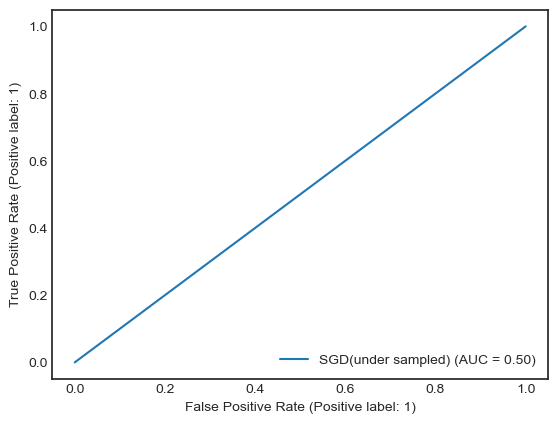

ROC AUC Score for SGD (under sampled): 0.5


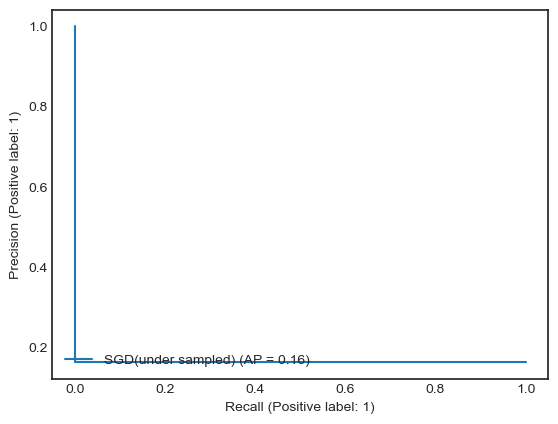

In [29]:
from sklearn.linear_model import SGDClassifier as sgd 

sgd_clf_under = sgd(random_state = 42) 
sgd_clf_under.fit(predictors_under_train, target_under_train)

model = "SGD"
sampling_type = "under sampled"
combined_name = model + "(" + sampling_type + ")"

print("Metrics Regarding Training Data:")
sgd_clf_under_predict_train = cross_val_predict(sgd_clf_under, predictors_under_train, target_under_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_under_train, sgd_clf_under_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_under_train, sgd_clf_under_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_under_train, sgd_clf_under_predict_train))
print (f"Train Accuracy {combined_name} " , avg(cross_val_score(sgd_clf_under, predictors_under_train, target_under_train
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_under_train, sgd_clf_under_predict_train))


print("Metrics Regarding Test Data:")
sgd_clf_under_predict_test = sgd_clf_under.predict(predictors_under_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_under_test, sgd_clf_under_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_under_test, sgd_clf_under_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_under_test, sgd_clf_under_predict_test))
print (f"Test Accuracy {combined_name} " , avg(cross_val_score(sgd_clf_under, predictors_under_test, target_under_test
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_under_test, sgd_clf_under_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_under_test, sgd_clf_under_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_under_test, sgd_clf_under_predict_test))



PrecisionRecallDisplay.from_predictions(target_under_test, sgd_clf_under_predict_test, name = combined_name)
plt.show()



## Decision Trees

Metrics Regarding Training Data:
Train Precision Score for Decision Tree(under sampled):  0.9002744739249772
Train Recall Score for Decision Tree(under sampled)  0.9060773480662984
Train F1 Score for Decision Tree(under sampled)  0.9031665901789813
Train Accuracy Decision Tree(under sampled)  0.9028474189320594
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1086
           1       0.90      0.91      0.90      1086

    accuracy                           0.90      2172
   macro avg       0.90      0.90      0.90      2172
weighted avg       0.90      0.90      0.90      2172

Metrics Regarding Test Data:
Test Precision Score for Decision Tree(under sampled):  0.5833333333333334
Test Recall Score for Decision Tree(under sampled):  0.8798521256931608
Test F1 Score for Decision Tree(under sampled):  0.7015475313190862
Test Accuracy Decision Tree(under sampled)  0.923407811243185
              precision    recall  f1-score   support


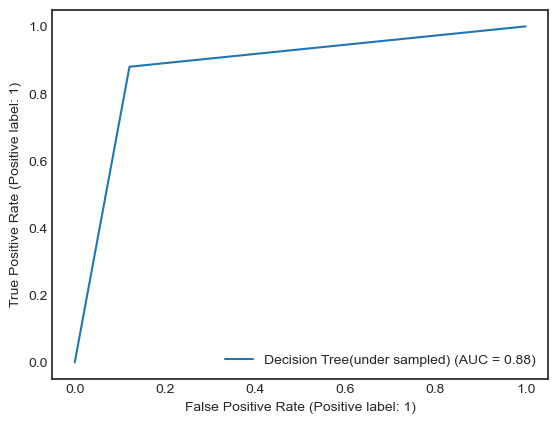

ROC AUC Score for Decision Tree (under sampled): 0.8792334530643598


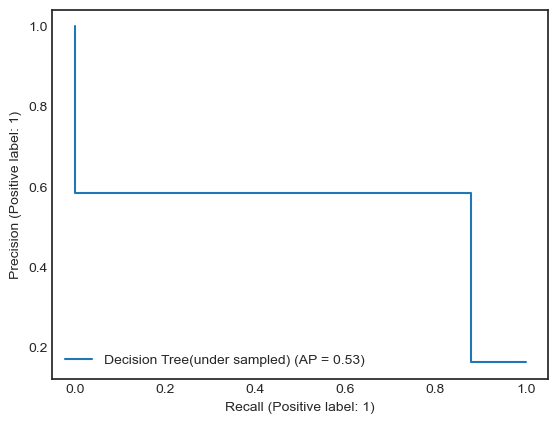

In [30]:
tree_clf_under = DecisionTreeClassifier(random_state=42)
tree_clf_under.fit(predictors_under_train, target_under_train)

model = "Decision Tree"
sampling_type = "under sampled"
combined_name = model + "(" + sampling_type + ")"

print("Metrics Regarding Training Data:")
tree_clf_under_predict_train = cross_val_predict(tree_clf_under, predictors_under_train, target_under_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_under_train, tree_clf_under_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_under_train, tree_clf_under_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_under_train, tree_clf_under_predict_train))
print (f"Train Accuracy {combined_name} " , avg(cross_val_score(tree_clf_under, predictors_under_train, target_under_train
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_under_train, tree_clf_under_predict_train))


print("Metrics Regarding Test Data:")
tree_clf_under_predict_test = tree_clf_under.predict(predictors_under_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_under_test, tree_clf_under_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_under_test, tree_clf_under_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_under_test, tree_clf_under_predict_test))
print (f"Test Accuracy {combined_name} " , avg(cross_val_score(tree_clf_under, predictors_under_test, target_under_test
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_under_test, tree_clf_under_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_under_test, tree_clf_under_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_under_test, tree_clf_under_predict_test))



PrecisionRecallDisplay.from_predictions(target_under_test, tree_clf_under_predict_test, name = combined_name)
plt.show()



## Random Forest

Metrics Regarding Training Data:
Train Precision Score for Random Forest(under sampled):  0.9361313868613139
Train Recall Score for Random Forest(under sampled)  0.9447513812154696
Train F1 Score for Random Forest(under sampled)  0.9404216315307058
Train Accuracy Random Forest(under sampled)  0.9401534689045787
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1086
           1       0.94      0.94      0.94      1086

    accuracy                           0.94      2172
   macro avg       0.94      0.94      0.94      2172
weighted avg       0.94      0.94      0.94      2172

Metrics Regarding Test Data:
Test Precision Score for Random Forest(under sampled):  0.7254623044096729
Test Recall Score for Random Forest(under sampled):  0.9426987060998152
Test F1 Score for Random Forest(under sampled):  0.8199356913183281
Test Accuracy Random Forest(under sampled)  0.9425605505407096
              precision    recall  f1-score   support

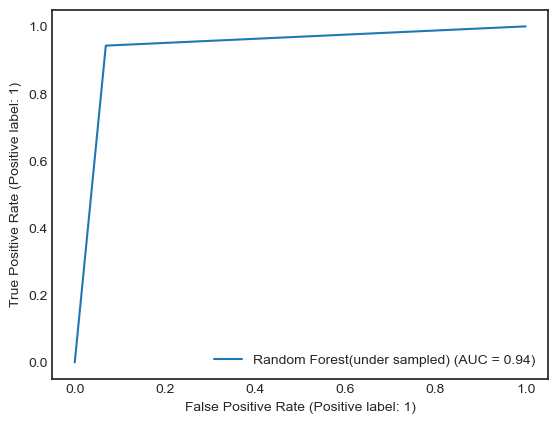

ROC AUC Score for Random Forest (under sampled): 0.9368973716147058


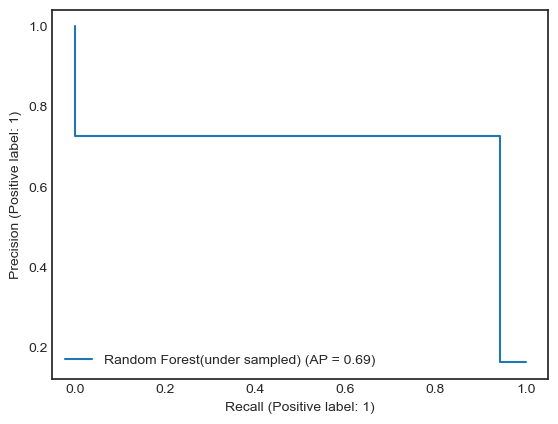

In [31]:
rnd_clf_under = RandomForestClassifier(random_state=42)
rnd_clf_under.fit(predictors_under_train, target_under_train)

model = "Random Forest"
sampling_type = "under sampled"
combined_name = model + "(" + sampling_type + ")"


print("Metrics Regarding Training Data:")
rnd_clf_under_predict_train = cross_val_predict(rnd_clf_under, predictors_under_train, target_under_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_under_train, rnd_clf_under_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_under_train, rnd_clf_under_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_under_train, rnd_clf_under_predict_train))
print (f"Train Accuracy {combined_name} " , avg(cross_val_score(rnd_clf_under, predictors_under_train, target_under_train
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_under_train, rnd_clf_under_predict_train))


print("Metrics Regarding Test Data:")
rnd_clf_under_predict_test = rnd_clf_under.predict(predictors_under_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_under_test, rnd_clf_under_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_under_test, rnd_clf_under_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_under_test, rnd_clf_under_predict_test))
print (f"Test Accuracy {combined_name} " , avg(cross_val_score(rnd_clf_under, predictors_under_test, target_under_test
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_under_test, rnd_clf_under_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_under_test, rnd_clf_under_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_under_test, rnd_clf_under_predict_test))



PrecisionRecallDisplay.from_predictions(target_under_test, rnd_clf_under_predict_test, name = combined_name)
plt.show()




## Support Vector Machines

Metrics Regarding Training Data:
Train Precision Score for SVM(under sampled):  0.7165876777251184
Train Recall Score for SVM(under sampled)  0.6961325966850829
Train F1 Score for SVM(under sampled)  0.7062120504437178
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1086
           1       0.72      0.70      0.71      1086

    accuracy                           0.71      2172
   macro avg       0.71      0.71      0.71      2172
weighted avg       0.71      0.71      0.71      2172

Metrics Regarding Test Data:
Test Precision Score for SVM(under sampled):  0.2979094076655052
Test Recall Score for SVM(under sampled):  0.6321626617375231
Test F1 Score for SVM(under sampled):  0.4049733570159858
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2801
           1       0.30      0.63      0.40       541

    accuracy                           0.70      3342
   macro avg       0.6

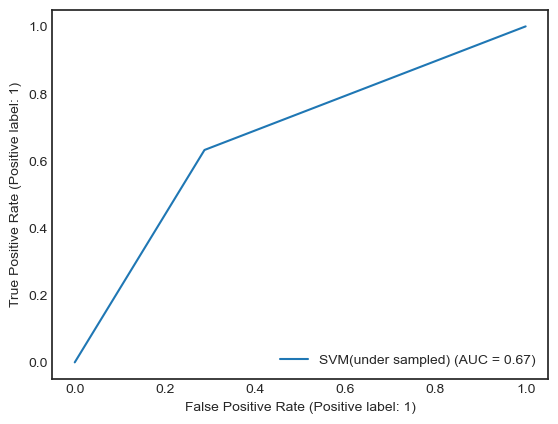

ROC AUC Score for SVM (under sampled): 0.6722041441497326


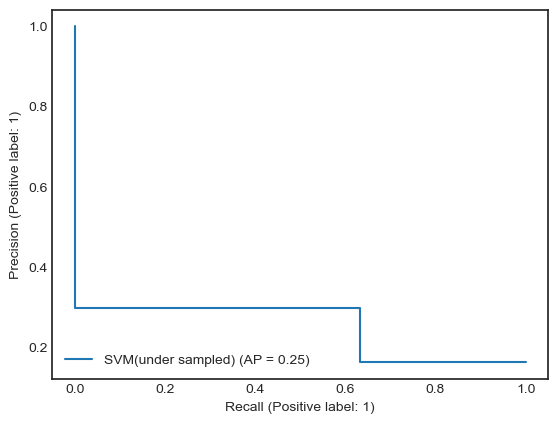

In [32]:
svm_clf_under = svm.SVC(gamma='scale', probability=True)
svm_clf_under.fit(predictors_under_train, target_under_train)

model = "SVM"
sampling_type = "under sampled"
combined_name = model + "(" + sampling_type + ")"

print("Metrics Regarding Training Data:")
svm_clf_under_predict_train = cross_val_predict(svm_clf_under, predictors_under_train, target_under_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_under_train, svm_clf_under_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_under_train, svm_clf_under_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_under_train, svm_clf_under_predict_train))




print(classification_report(target_under_train, svm_clf_under_predict_train))


print("Metrics Regarding Test Data:")
svm_clf_under_predict_test = svm_clf_under.predict(predictors_under_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_under_test, svm_clf_under_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_under_test, svm_clf_under_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_under_test, svm_clf_under_predict_test))



print(classification_report(target_under_test, svm_clf_under_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_under_test, svm_clf_under_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_under_test, svm_clf_under_predict_test))



PrecisionRecallDisplay.from_predictions(target_under_test, svm_clf_under_predict_test, name = combined_name)
plt.show()





## Two best ensemble

Metrics Regarding Training Data:
Train Precision Score for DT & RF Ensemble(under sampled):  0.9010989010989011
Train Recall Score for DT & RF Ensemble(under sampled)  0.9060773480662984
Train F1 Score for DT & RF Ensemble(under sampled)  0.9035812672176309
Train Accuracy DT & RF Ensemble(under sampled)  0.9033061345283897
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1086
           1       0.90      0.91      0.90      1086

    accuracy                           0.90      2172
   macro avg       0.90      0.90      0.90      2172
weighted avg       0.90      0.90      0.90      2172

Metrics Regarding Test Data:
Test Precision Score for DT & RF Ensemble(under sampled):  0.5833333333333334
Test Recall Score for DT & RF Ensemble(under sampled):  0.8798521256931608
Test F1 Score for DT & RF Ensemble(under sampled):  0.7015475313190862
Test Accuracy DT & RF Ensemble(under sampled)  0.92370721244079
              precision    reca

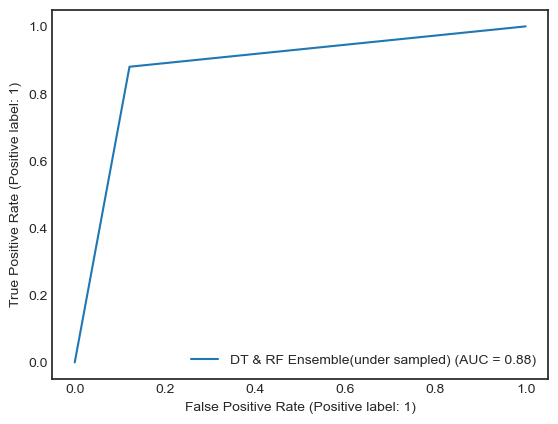

ROC AUC Score for DT & RF Ensemble (under sampled): 0.8792334530643598


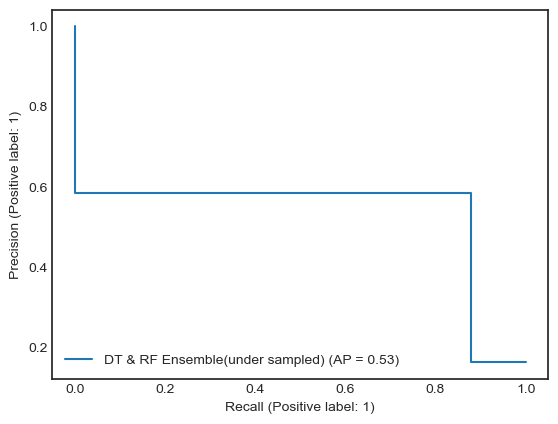

In [33]:
voting_clf_two_under = VotingClassifier(
    estimators=[('Decision TRee', tree_clf_under), ('Random Forest', rnd_clf_under)],
    voting='soft') # Soft voting
voting_clf_two_under.fit(predictors_under_train, target_under_train)

model = "DT & RF Ensemble"
sampling_type = "under sampled"
combined_name = model + "(" + sampling_type + ")"

print("Metrics Regarding Training Data:")
voting_clf_two_under_predict_train = cross_val_predict(voting_clf_two_under, predictors_under_train, target_under_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_under_train, voting_clf_two_under_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_under_train, voting_clf_two_under_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_under_train, voting_clf_two_under_predict_train))
print (f"Train Accuracy {combined_name} " , avg(cross_val_score(voting_clf_two_under, predictors_under_train, target_under_train
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_under_train, voting_clf_two_under_predict_train))


print("Metrics Regarding Test Data:")
voting_clf_two_under_predict_test = voting_clf_two_under.predict(predictors_under_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_under_test, voting_clf_two_under_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_under_test, voting_clf_two_under_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_under_test, voting_clf_two_under_predict_test))
print (f"Test Accuracy {combined_name} " , avg(cross_val_score(voting_clf_two_under, predictors_under_test, target_under_test
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_under_test, voting_clf_two_under_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_under_test, voting_clf_two_under_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_under_test, voting_clf_two_under_predict_test))



PrecisionRecallDisplay.from_predictions(target_under_test, voting_clf_two_under_predict_test, name = combined_name)
plt.show()



## Classifiers using SMOTE sampling

### KNN (N=5)

Metrics Regarding Training Data:
Train Precision Score for DT & RF Ensemble(under sampled):  0.8753005289309184
Train Recall Score for DT & RF Ensemble(under sampled)  0.9582382874188454
Train F1 Score for DT & RF Ensemble(under sampled)  0.9148936170212766
Train Accuracy DT & RF Ensemble(under sampled)  0.9108630223495526
              precision    recall  f1-score   support

           0       0.95      0.86      0.91      5699
           1       0.88      0.96      0.91      5699

    accuracy                           0.91     11398
   macro avg       0.91      0.91      0.91     11398
weighted avg       0.91      0.91      0.91     11398

Metrics Regarding Test Data:
Test Precision Score for DT & RF Ensemble(under sampled):  0.5018181818181818
Test Recall Score for DT & RF Ensemble(under sampled):  0.7652495378927912
Test F1 Score for DT & RF Ensemble(under sampled):  0.6061493411420205
Test Accuracy DT & RF Ensemble(under sampled)  0.8755197068549467
              precision    re

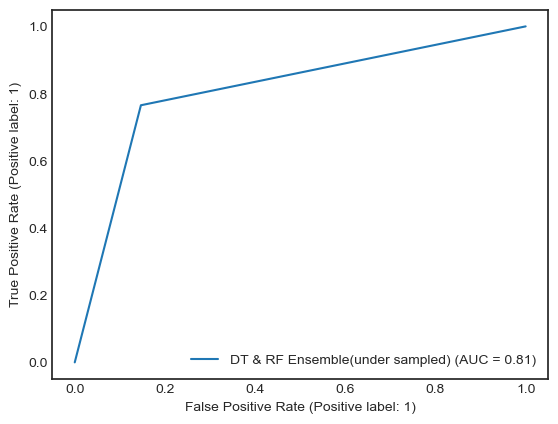

ROC AUC Score for DT & RF Ensemble (under sampled): 0.8092581141802406


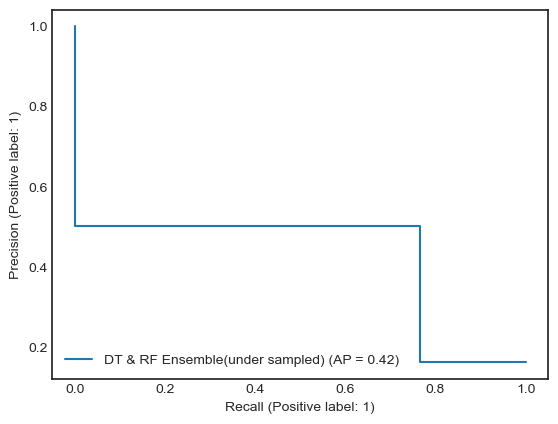

In [34]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score 


knn_clf_smote = knn(n_neighbors=5)
knn_clf_smote.fit(predictors_smote_train, target_smote_train)

print("Metrics Regarding Training Data:")
knn_clf_smote_predict_train = cross_val_predict(knn_clf_smote, predictors_smote_train, target_smote_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_smote_train, knn_clf_smote_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_smote_train, knn_clf_smote_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_smote_train, knn_clf_smote_predict_train))
print (f"Train Accuracy {combined_name} " , avg(cross_val_score(knn_clf_smote, predictors_smote_train, target_smote_train
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_smote_train, knn_clf_smote_predict_train))


print("Metrics Regarding Test Data:")
knn_clf_smote_predict_test = knn_clf_smote.predict(predictors_smote_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_smote_test, knn_clf_smote_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_smote_test, knn_clf_smote_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_smote_test, knn_clf_smote_predict_test))
print (f"Test Accuracy {combined_name} " , avg(cross_val_score(knn_clf_smote, predictors_smote_test, target_smote_test
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_smote_test, knn_clf_smote_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_smote_test, knn_clf_smote_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_smote_test, knn_clf_smote_predict_test))



PrecisionRecallDisplay.from_predictions(target_smote_test, knn_clf_smote_predict_test, name = combined_name)
plt.show()



### SGD

Metrics Regarding Training Data:
Train Precision Score for DT & RF Ensemble(under sampled):  0.6258840169731259
Train Recall Score for DT & RF Ensemble(under sampled)  0.7764520091244078
Train F1 Score for DT & RF Ensemble(under sampled)  0.6930848147858094
Train Accuracy DT & RF Ensemble(under sampled)  0.6561795511606057
              precision    recall  f1-score   support

           0       0.71      0.54      0.61      5699
           1       0.63      0.78      0.69      5699

    accuracy                           0.66     11398
   macro avg       0.67      0.66      0.65     11398
weighted avg       0.67      0.66      0.65     11398

Metrics Regarding Test Data:
Test Precision Score for DT & RF Ensemble(under sampled):  0.2470948012232416
Test Recall Score for DT & RF Ensemble(under sampled):  0.7467652495378928
Test F1 Score for DT & RF Ensemble(under sampled):  0.3713235294117647
Test Accuracy DT & RF Ensemble(under sampled)  0.7384323889534363
              precision    re

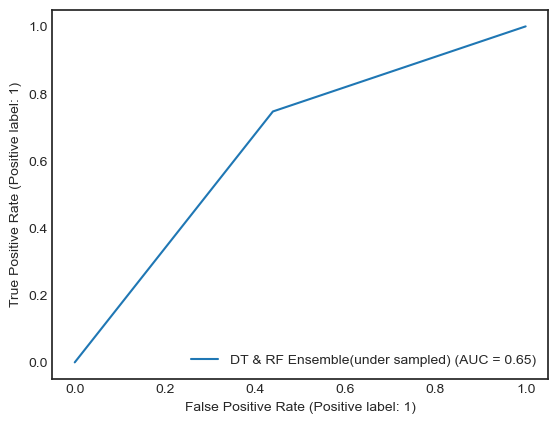

ROC AUC Score for DT & RF Ensemble (under sampled): 0.6536396758221418


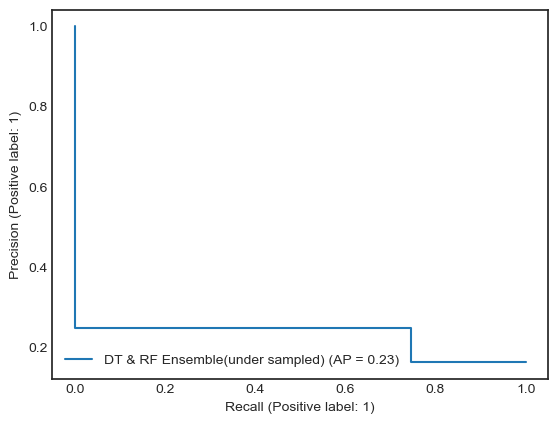

In [35]:
from sklearn.linear_model import SGDClassifier as sgd 

sgd_clf_smote = sgd(random_state = 42) 
sgd_clf_smote.fit(predictors_smote_train, target_smote_train)


print("Metrics Regarding Training Data:")
sgd_clf_smote_predict_train = cross_val_predict(sgd_clf_smote, predictors_smote_train, target_smote_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_smote_train, sgd_clf_smote_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_smote_train, sgd_clf_smote_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_smote_train, sgd_clf_smote_predict_train))
print (f"Train Accuracy {combined_name} " , avg(cross_val_score(sgd_clf_smote, predictors_smote_train, target_smote_train
                                                            , cv=10, scoring="accuracy")))


print(classification_report(target_smote_train, sgd_clf_smote_predict_train))


print("Metrics Regarding Test Data:")
sgd_clf_smote_predict_test = sgd_clf_smote.predict(predictors_smote_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_smote_test, sgd_clf_smote_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_smote_test, sgd_clf_smote_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_smote_test, sgd_clf_smote_predict_test))
print (f"Test Accuracy {combined_name} " , avg(cross_val_score(sgd_clf_smote, predictors_smote_test, target_smote_test
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_smote_test, sgd_clf_smote_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_smote_test, sgd_clf_smote_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_smote_test, sgd_clf_smote_predict_test))



PrecisionRecallDisplay.from_predictions(target_smote_test, sgd_clf_smote_predict_test, name = combined_name)
plt.show()



Collection of random acknowledgements I still need to sort out: 
https://stackoverflow.com/questions/40008015/problems-importing-imblearn-python-package-on-ipython-notebook
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
https://stackoverflow.com/questions/48841624/dataframe-object-has-no-attribute-ravel-when-transforming-target-variable
https://stackoverflow.com/questions/48593157/pandas-dataframe-encode-categorical-variable-with-thousands-of-unique-values
https://stackoverflow.com/questions/42196589/any-way-to-get-mappings-of-a-label-encoder-in-python-pandas

## Decision Trees

Metrics Regarding Training Data:
Train Precision Score for Decision Tree(SMOTE sampled):  0.9489724834552421
Train Recall Score for Decision Tree(SMOTE sampled)  0.9561326548517284
Train F1 Score for Decision Tree(SMOTE sampled)  0.9525391137138361
Train Accuracy Decision Tree(SMOTE sampled)  0.9523625679651279
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      5699
           1       0.95      0.96      0.95      5699

    accuracy                           0.95     11398
   macro avg       0.95      0.95      0.95     11398
weighted avg       0.95      0.95      0.95     11398

Metrics Regarding Test Data:
Test Precision Score for Decision Tree(SMOTE sampled):  0.7312
Test Recall Score for Decision Tree(SMOTE sampled):  0.844731977818854
Test F1 Score for Decision Tree(SMOTE sampled):  0.7838765008576328
Test Accuracy Decision Tree(SMOTE sampled)  0.923407811243185
              precision    recall  f1-score   support

           0

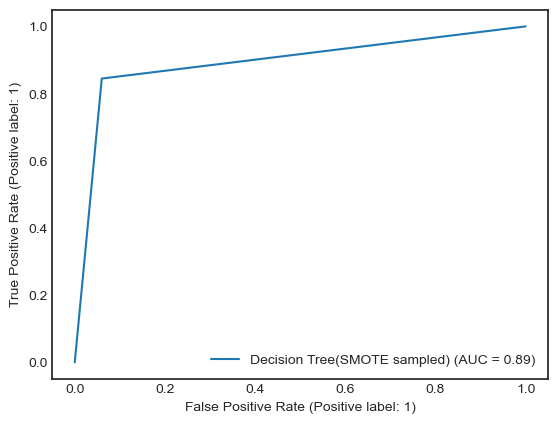

ROC AUC Score for Decision Tree (SMOTE sampled): 0.8923766993699769


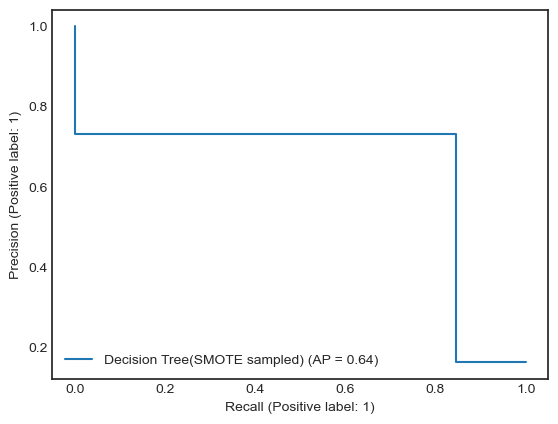

In [36]:
tree_clf_smote = DecisionTreeClassifier(random_state=42)
tree_clf_smote.fit(predictors_smote_train, target_smote_train)

model = "Decision Tree"
sampling_type = "SMOTE sampled"
combined_name = model + "(" + sampling_type + ")"

print("Metrics Regarding Training Data:")
tree_clf_smote_predict_train = cross_val_predict(tree_clf_smote, predictors_smote_train, target_smote_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_smote_train, tree_clf_smote_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_smote_train, tree_clf_smote_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_smote_train, tree_clf_smote_predict_train))
print (f"Train Accuracy {combined_name} " , avg(cross_val_score(tree_clf_smote, predictors_smote_train, target_smote_train
                                                            , cv=10, scoring="accuracy")))


print(classification_report(target_smote_train, tree_clf_smote_predict_train))


print("Metrics Regarding Test Data:")
tree_clf_smote_predict_test = tree_clf_smote.predict(predictors_smote_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_smote_test, tree_clf_smote_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_smote_test, tree_clf_smote_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_smote_test, tree_clf_smote_predict_test))
print (f"Test Accuracy {combined_name} " , avg(cross_val_score(tree_clf_smote, predictors_smote_test, target_smote_test
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_smote_test, tree_clf_smote_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_smote_test, tree_clf_smote_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_smote_test, tree_clf_smote_predict_test))



PrecisionRecallDisplay.from_predictions(target_smote_test, tree_clf_smote_predict_test, name = combined_name)
plt.show()



## Random Forest

Metrics Regarding Training Data:
Train Precision Score for Random Forest(SMOTE sampled):  0.9720873786407767
Train Recall Score for Random Forest(SMOTE sampled)  0.983856816985436
Train F1 Score for Random Forest(SMOTE sampled)  0.97793668788698
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5699
           1       0.97      0.98      0.98      5699

    accuracy                           0.98     11398
   macro avg       0.98      0.98      0.98     11398
weighted avg       0.98      0.98      0.98     11398

Metrics Regarding Test Data:
Test Precision Score for Random Forest(SMOTE sampled):  0.8661844484629295
Test Recall Score for Random Forest(SMOTE sampled):  0.8853974121996303
Test F1 Score for Random Forest(SMOTE sampled):  0.8756855575868373
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2801
           1       0.87      0.89      0.88       541

    accuracy       

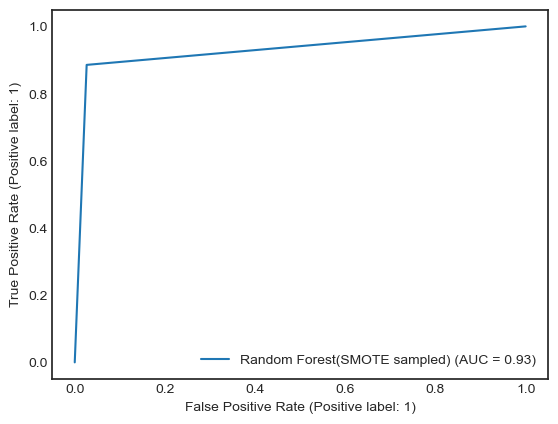

ROC AUC Score for Random Forest (SMOTE sampled): 0.9294891380883907


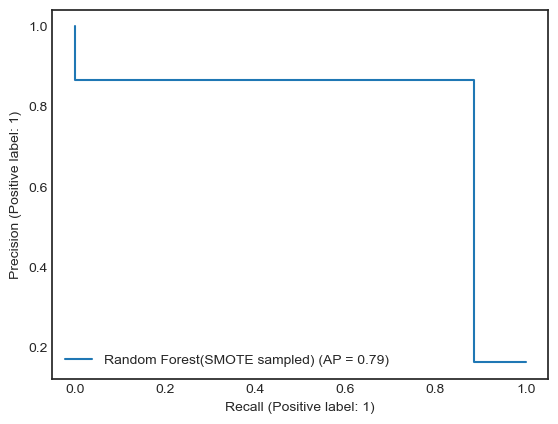

In [37]:
rnd_clf_smote = RandomForestClassifier(random_state=42)
rnd_clf_smote.fit(predictors_smote_train, target_smote_train)

model = "Random Forest"
sampling_type = "SMOTE sampled"
combined_name = model + "(" + sampling_type + ")"

print("Metrics Regarding Training Data:")
rnd_clf_smote_predict_train = cross_val_predict(rnd_clf_smote, predictors_smote_train, target_smote_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_smote_train, rnd_clf_smote_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_smote_train, rnd_clf_smote_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_smote_train, rnd_clf_smote_predict_train))


print(classification_report(target_smote_train, rnd_clf_smote_predict_train))


print("Metrics Regarding Test Data:")
rnd_clf_smote_predict_test = rnd_clf_smote.predict(predictors_smote_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_smote_test, rnd_clf_smote_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_smote_test, rnd_clf_smote_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_smote_test, rnd_clf_smote_predict_test))



print(classification_report(target_smote_test, rnd_clf_smote_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_smote_test, rnd_clf_smote_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_smote_test, rnd_clf_smote_predict_test))



PrecisionRecallDisplay.from_predictions(target_smote_test, rnd_clf_smote_predict_test, name = combined_name)
plt.show()



## Support Vector Machine

Metrics Regarding Training Data:
Train Precision Score for SVM(SMOTE sampled):  0.7420518989517099
Train Recall Score for SVM(SMOTE sampled)  0.7576767854009475
Train F1 Score for SVM(SMOTE sampled)  0.7497829484285466
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      5699
           1       0.74      0.76      0.75      5699

    accuracy                           0.75     11398
   macro avg       0.75      0.75      0.75     11398
weighted avg       0.75      0.75      0.75     11398

Metrics Regarding Test Data:
Test Precision Score for SVM(SMOTE sampled):  0.32157850545759864
Test Recall Score for SVM(SMOTE sampled):  0.7079482439926063
Test F1 Score for SVM(SMOTE sampled):  0.4422632794457274
              precision    recall  f1-score   support

           0       0.93      0.71      0.80      2801
           1       0.32      0.71      0.44       541

    accuracy                           0.71      3342
   macro avg       0.

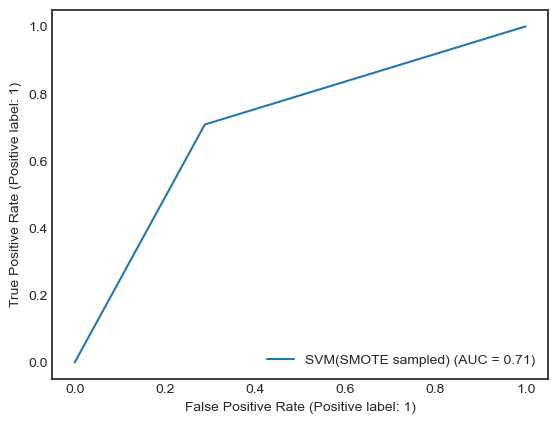

ROC AUC Score for SVM (SMOTE sampled): 0.709739919925614


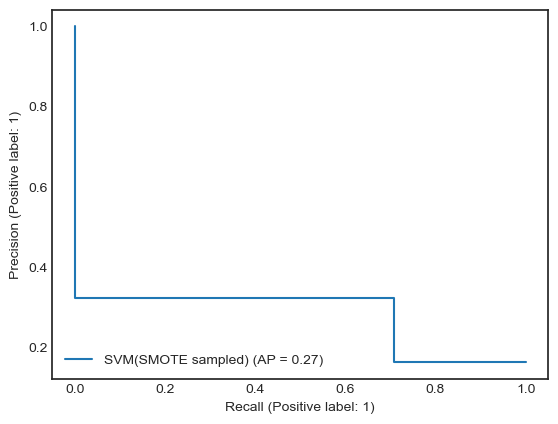

In [38]:
svm_clf_smote = svm.SVC(gamma='scale', probability=True)
svm_clf_smote.fit(predictors_smote_train, target_smote_train)

model = "SVM"
sampling_type = "SMOTE sampled"
combined_name = model + "(" + sampling_type + ")"


print("Metrics Regarding Training Data:")
svm_clf_smote_predict_train = cross_val_predict(svm_clf_smote, predictors_smote_train, target_smote_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_smote_train, svm_clf_smote_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_smote_train, svm_clf_smote_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_smote_train, svm_clf_smote_predict_train))


print(classification_report(target_smote_train, svm_clf_smote_predict_train))


print("Metrics Regarding Test Data:")
svm_clf_smote_predict_test = svm_clf_smote.predict(predictors_smote_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_smote_test, svm_clf_smote_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_smote_test, svm_clf_smote_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_smote_test, svm_clf_smote_predict_test))



print(classification_report(target_smote_test, svm_clf_smote_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_smote_test, svm_clf_smote_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_smote_test, svm_clf_smote_predict_test))



PrecisionRecallDisplay.from_predictions(target_smote_test, svm_clf_smote_predict_test, name = combined_name)
plt.show()



## Two Best Ensemble

Metrics Regarding Training Data:
Train Precision Score for DT & RF Ensemble(SMOTE sampled):  0.9491377808744121
Train Recall Score for DT & RF Ensemble(SMOTE sampled)  0.9561326548517284
Train F1 Score for DT & RF Ensemble(SMOTE sampled)  0.9526223776223777
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      5699
           1       0.95      0.96      0.95      5699

    accuracy                           0.95     11398
   macro avg       0.95      0.95      0.95     11398
weighted avg       0.95      0.95      0.95     11398

Metrics Regarding Test Data:
Test Precision Score for DT & RF Ensemble(SMOTE sampled):  0.7335473515248796
Test Recall Score for DT & RF Ensemble(SMOTE sampled):  0.844731977818854
Test F1 Score for DT & RF Ensemble(SMOTE sampled):  0.7852233676975946
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2801
           1       0.73      0.84      0.79       541


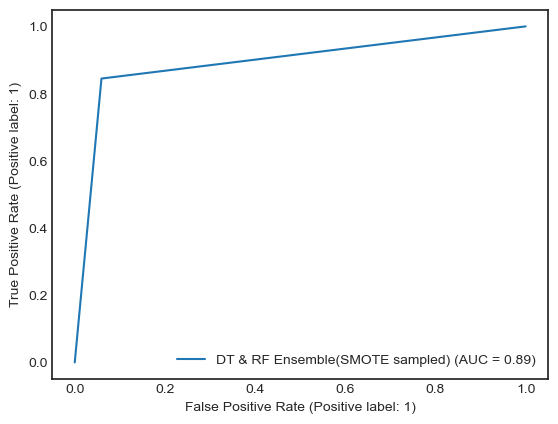

ROC AUC Score for DT & RF Ensemble (SMOTE sampled): 0.8927337147216369


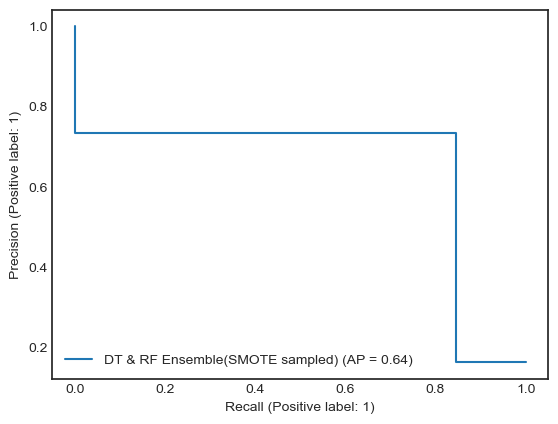

In [39]:
voting_clf_two_smote = VotingClassifier(
    estimators=[('Decision TRee', tree_clf_smote), ('Random Forest', rnd_clf_smote)],
    voting='soft') # Soft voting
voting_clf_two_smote.fit(predictors_smote_train, target_smote_train)

model = "DT & RF Ensemble"
sampling_type = "SMOTE sampled"
combined_name = model + "(" + sampling_type + ")"

print("Metrics Regarding Training Data:")
voting_clf_two_smote_predict_train = cross_val_predict(voting_clf_two_smote, predictors_smote_train, target_smote_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_smote_train, voting_clf_two_smote_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_smote_train, voting_clf_two_smote_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_smote_train, voting_clf_two_smote_predict_train))


print(classification_report(target_smote_train, voting_clf_two_smote_predict_train))


print("Metrics Regarding Test Data:")
voting_clf_two_smote_predict_test = voting_clf_two_smote.predict(predictors_smote_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_smote_test, voting_clf_two_smote_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_smote_test, voting_clf_two_smote_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_smote_test, voting_clf_two_smote_predict_test))


print(classification_report(target_smote_test, voting_clf_two_smote_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_smote_test, voting_clf_two_smote_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_smote_test, voting_clf_two_smote_predict_test))



PrecisionRecallDisplay.from_predictions(target_smote_test, voting_clf_two_smote_predict_test, name = combined_name)
plt.show()




# Ensembling all of the best classifiers

Metrics Regarding Training Data:
Train Precision Score for Best of all Samplers Ensemble():  0.9720873786407767
Train Recall Score for Best of all Samplers Ensemble()  0.983856816985436
Train F1 Score for Best of all Samplers Ensemble()  0.97793668788698
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5699
           1       0.97      0.98      0.98      5699

    accuracy                           0.98     11398
   macro avg       0.98      0.98      0.98     11398
weighted avg       0.98      0.98      0.98     11398

Metrics Regarding Test Data:
Test Precision Score for Best of all Samplers Ensemble():  0.9276315789473685
Test Recall Score for Best of all Samplers Ensemble():  0.7818853974121996
Test F1 Score for Best of all Samplers Ensemble():  0.8485456369107323
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2801
           1       0.93      0.78      0.85       541

 

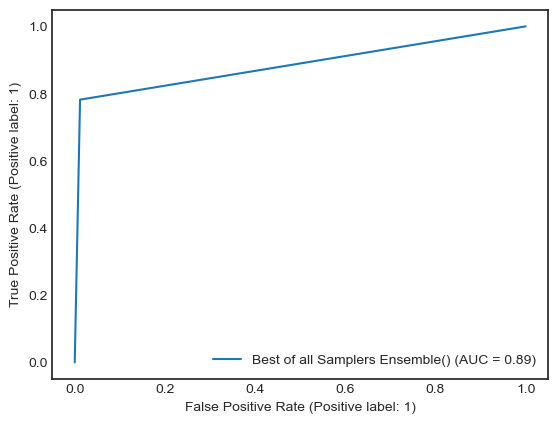

ROC AUC Score for Best of all Samplers Ensemble (): 0.8850519454037078


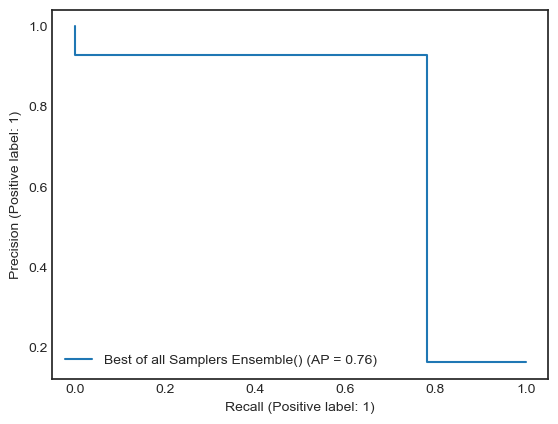

In [42]:
voting_clf_best_of_all = VotingClassifier(
    estimators=[('Random Forest Oversampled', rnd_clf_over), ('Random Forest Undersampled', rnd_clf_under), ('Random Forest SMOTE', rnd_clf_smote)],
    voting='soft') # Soft voting
voting_clf_best_of_all.fit(predictors_train, target_train)

model = "Best of all Samplers Ensemble"
sampling_type = ""
combined_name = model + "(" + sampling_type + ")"

print("Metrics Regarding Training Data:")
voting_clf_best_of_all_predict_train = cross_val_predict(voting_clf_best_of_all, predictors_smote_train, target_smote_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_smote_train, voting_clf_best_of_all_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_smote_train, voting_clf_best_of_all_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_smote_train, voting_clf_best_of_all_predict_train))


print(classification_report(target_smote_train, voting_clf_best_of_all_predict_train))


print("Metrics Regarding Test Data:")
voting_clf_best_of_all_predict_test = voting_clf_best_of_all.predict(predictors_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_test, voting_clf_best_of_all_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_test, voting_clf_best_of_all_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_test, voting_clf_best_of_all_predict_test))



print(classification_report(target_test, voting_clf_best_of_all_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_test, voting_clf_best_of_all_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_test, voting_clf_best_of_all_predict_test))



PrecisionRecallDisplay.from_predictions(target_test, voting_clf_best_of_all_predict_test, name = combined_name)
plt.show()


# Feature importance

As we've seen before, undersampling is the best since it helps us maximize our recall. Thus, we'll use the best model of our undersampled model to grab feature importance.

<BarContainer object of 22 artists>

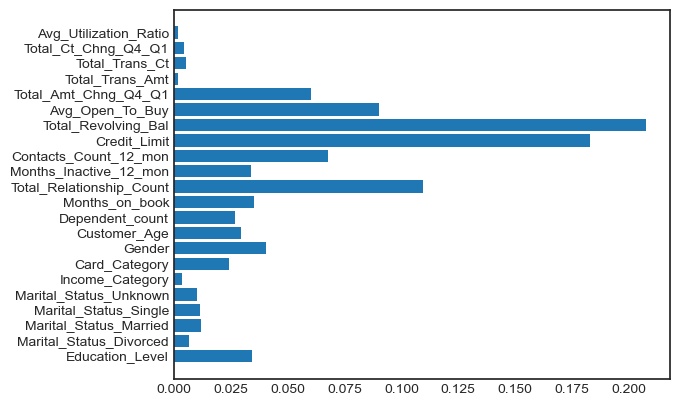

In [43]:
plt.barh(dataset_standardized.columns, rnd_clf_under.feature_importances_)


We'll now reduce our features to those that Roughly Exceed the threshold of 0.05. We'll train our data based on these reduced parameters, and let's see how it stacks up against our regular classifier.

In [44]:
predictors_reduced = dataset_standardized[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Contacts_Count_12_mon', 'Total_Relationship_Count', 'Gender']].copy()
reduced_predictors_train, reduced_predictors_test, reduced_target_train, reduced_target_test = train_test_split(predictors_reduced, raveled_target, test_size = 0.33,  random_state = 42)
reduced_predictors_undersampled, reduced_target_undersampled = undersampler.fit_resample(reduced_predictors_train, reduced_target_train)


These are the stats regarding our regular classifier:

Metrics Regarding Training Data:
Train Precision Score for Random Forest(Under Sampled):  0.9361313868613139
Train Recall Score for Random Forest(Under Sampled)  0.9447513812154696
Train F1 Score for Random Forest(Under Sampled)  0.9404216315307058
Train Accuracy Random Forest(Under Sampled)  0.9401534689045787
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1086
           1       0.94      0.94      0.94      1086

    accuracy                           0.94      2172
   macro avg       0.94      0.94      0.94      2172
weighted avg       0.94      0.94      0.94      2172

Metrics Regarding Test Data:
Test Precision Score for Random Forest(Under Sampled):  0.7254623044096729
Test Recall Score for Random Forest(Under Sampled):  0.9426987060998152
Test F1 Score for Random Forest(Under Sampled):  0.8199356913183281
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2801
       

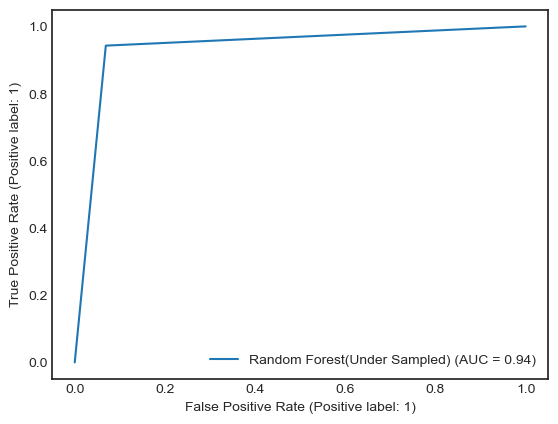

ROC AUC Score for Random Forest (Under Sampled): 0.9368973716147058


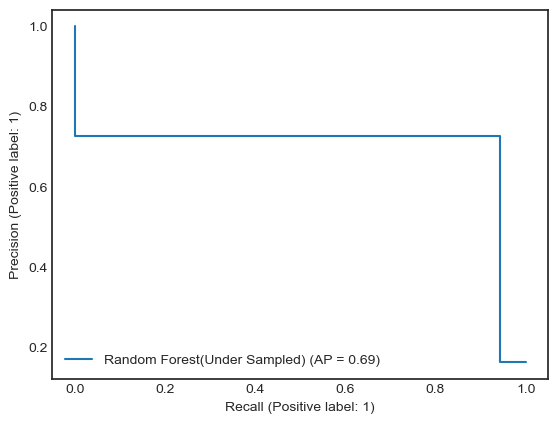

In [45]:
model = "Random Forest"
sampling_type = "Under Sampled"
combined_name = model + "(" + sampling_type + ")"


print("Metrics Regarding Training Data:")
rnd_clf_under_predict_train = cross_val_predict(rnd_clf_under, predictors_under_train, target_under_train, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(target_under_train, rnd_clf_under_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(target_under_train, rnd_clf_under_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(target_under_train, rnd_clf_under_predict_train))
print (f"Train Accuracy {combined_name} " , avg(cross_val_score(rnd_clf_under, predictors_under_train, target_under_train
                                                            , cv=10, scoring="accuracy")))



print(classification_report(target_under_train, rnd_clf_under_predict_train))


print("Metrics Regarding Test Data:")
rnd_clf_under_predict_test = rnd_clf_under.predict(predictors_under_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(target_under_test, rnd_clf_under_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(target_under_test, rnd_clf_under_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(target_under_test, rnd_clf_under_predict_test))




print(classification_report(target_under_test, rnd_clf_under_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(target_under_test, rnd_clf_under_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(target_under_test, rnd_clf_under_predict_test))



PrecisionRecallDisplay.from_predictions(target_under_test, rnd_clf_under_predict_test, name = combined_name)
plt.show()


Metrics Regarding Training Data:
Train Precision Score for Random Forest(Under Sampled, Reduced Predictors):  0.7791970802919708
Train Recall Score for Random Forest(Under Sampled, Reduced Predictors)  0.7863720073664825
Train F1 Score for Random Forest(Under Sampled, Reduced Predictors)  0.7827681026581118
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1086
           1       0.78      0.79      0.78      1086

    accuracy                           0.78      2172
   macro avg       0.78      0.78      0.78      2172
weighted avg       0.78      0.78      0.78      2172

Metrics Regarding Test Data:
Test Precision Score for Random Forest(Under Sampled, Reduced Predictors):  0.391713747645951
Test Recall Score for Random Forest(Under Sampled, Reduced Predictors):  0.7689463955637708
Test F1 Score for Random Forest(Under Sampled, Reduced Predictors):  0.5190268247036806
              precision    recall  f1-score   support

      

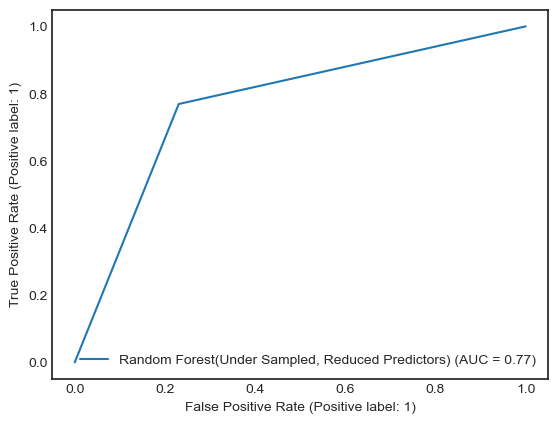

ROC AUC Score for Random Forest (Under Sampled, Reduced Predictors): 0.7691572391956661


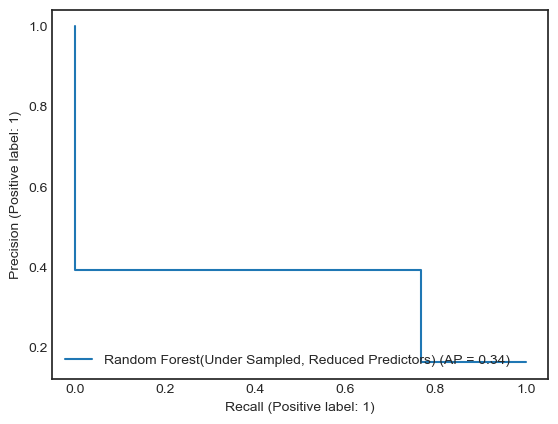

In [46]:
rnd_clf_reduced = RandomForestClassifier(random_state=42)
rnd_clf_reduced.fit(reduced_predictors_undersampled, reduced_target_undersampled)

model = "Random Forest"
sampling_type = "Under Sampled, Reduced Predictors"
combined_name = model + "(" + sampling_type + ")"

print("Metrics Regarding Training Data:")
rnd_clf_reduced_predict_train = cross_val_predict(rnd_clf_reduced, reduced_predictors_undersampled, reduced_target_undersampled, cv=10)
print (f"Train Precision Score for {combined_name}: ", precision_score(reduced_target_undersampled, rnd_clf_reduced_predict_train))
print (f"Train Recall Score for {combined_name} " , recall_score(reduced_target_undersampled, rnd_clf_reduced_predict_train))
print (f"Train F1 Score for {combined_name} " , f1_score(reduced_target_undersampled, rnd_clf_reduced_predict_train))


print(classification_report(reduced_target_undersampled, rnd_clf_reduced_predict_train))


print("Metrics Regarding Test Data:")
rnd_clf_reduced_predict_test = rnd_clf_reduced.predict(reduced_predictors_test)
print (f"Test Precision Score for {combined_name}: ", precision_score(reduced_target_test, rnd_clf_reduced_predict_test))
print (f"Test Recall Score for {combined_name}: " , recall_score(reduced_target_test, rnd_clf_reduced_predict_test))
print (f"Test F1 Score for {combined_name}: " , f1_score(reduced_target_test, rnd_clf_reduced_predict_test))



print(classification_report(reduced_target_test, rnd_clf_reduced_predict_test))

from sklearn.metrics import roc_auc_score


from sklearn import metrics 
RocCurveDisplay.from_predictions(reduced_target_test, rnd_clf_reduced_predict_test, name = combined_name)
plt.show()
print(f"ROC AUC Score for {model} ({sampling_type}):", roc_auc_score(reduced_target_test, rnd_clf_reduced_predict_test))



PrecisionRecallDisplay.from_predictions(reduced_target_test, rnd_clf_reduced_predict_test, name = combined_name)
plt.show()

As seen above, we perserved our recall at ~77 compared with 88, meaning we only had a (.10) loss to our recall. However, the hit to our ROC AUC was significant, at (-.15), though our cross validated accuracy only took a (.6) hit. Precision was the only major issue, losing nearly half of our precision for the Attrited Customer class, though isn't so much an issue, since a false positive is hardly an issue. 